Use Forward Eurler method to simulate SIR model in which population is slowly growing

In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
#from function in class demo
#population slowly growing

def SIR_birthdeath(S0,I0,R0, beta, gamma, mu, t_max, stepsize):
    T = np.arange(0,t_max+stepsize,stepsize)
    S = np.zeros(len(T))
    I = np.zeros(len(T))
    R = np.zeros(len(T))
   # N = S0+I0+R0 --> constant, propulation is slowly gowing
  #  N = S[idx -1]+ I[idx - 1] + R[idx - 1]
    
    for idx,t in enumerate(T):
        if idx==0:
            S[idx] = S0
            I[idx] = I0
            R[idx] = R0
        else:
            N = S[idx -1]+ I[idx - 1] + R[idx - 1] #N changes due to birth and death, N is recaclulated at each step
            
            dS_dt = -beta * S[idx-1] * I[idx-1] / N - mu*S[idx-1] + mu*N
            dI_dt = beta * S[idx-1] * I[idx-1] / N - gamma * I[idx-1] - mu*I[idx-1]
            dR_dt = gamma * I[idx-1] - mu*R[idx-1]
            
            S[idx] = S[idx-1] + dS_dt * stepsize
            I[idx] = I[idx-1] + dI_dt * stepsize
            R[idx] = R[idx-1] + dR_dt * stepsize
    
    return S, I, R, T

#use birth and death model, birth is higher than death so population is slowly growing

In [20]:
#plot for N = 1500
def SIR_FifteenHundred(S0,I0,R0, beta, gamma, mu_birth, stepsize):
    N0 = S0+I0+R0
    #t_max, we want to find time until the population grows 50% --> 1500
    #N(t) = 1500 --> 1500 = 1000 * e^{ert_max}
    t_max = np.log(1500 / N0) / mu_birth
    
    T = np.arange(0,t_max+stepsize,stepsize)
    S = np.zeros(len(T))
    I = np.zeros(len(T))
    R = np.zeros(len(T))
   # N = S0+I0+R0 --> constant, propulation is slowly gowing
  # N = S[idx -1]+ I[idx - 1] + R[idx - 1]
    
    for idx,t in enumerate(T):
        if idx==0:
            S[idx] = S0
            I[idx] = I0
            R[idx] = R0
        else:
            N = S[idx -1]+ I[idx - 1] + R[idx - 1] #N changes due to birth and death, N is recaclulated at each step
            
            dS_dt = -beta * S[idx-1] * I[idx-1] / N - (mu_birth*S[idx-1]*0.5) + mu_birth*N
            dI_dt = beta * S[idx-1] * I[idx-1] / N - gamma * I[idx-1] - (mu_birth*I[idx-1]*0.5)
            dR_dt = gamma * I[idx-1] - (mu_birth*R[idx-1]*0.5)
            
            S[idx] = S[idx-1] + dS_dt * stepsize
            I[idx] = I[idx-1] + dI_dt * stepsize
            R[idx] = R[idx-1] + dR_dt * stepsize

        if S[idx]+I[idx]+R[idx] >= 1500:
            num_steps = idx + 1
            S_sim = S[:num_steps]
            I_sim = I[:num_steps]
            R_sim = R[:num_steps]
            T_sim = T[:num_steps]

            return S_sim, I_sim, R_sim, T_sim
            
    
    return S, I, R, T

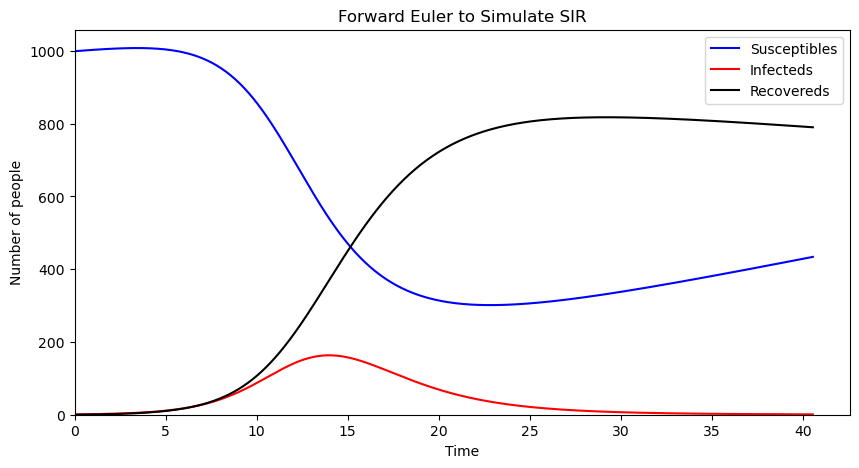

In [23]:
fig, ax = plt.subplots(figsize=(10,5))  # only one axis now
beta = 1
gamma = 0.5
mu = 0.01
#N_max = 1500 #want to track until N is 1500

S, I, R, T = SIR_FifteenHundred(999,1,0, beta,gamma,mu,0.05)
ax.plot(T, S, color='b', label='Susceptibles')
ax.plot(T, I, color='r', label='Infecteds')
ax.plot(T, R, color='k', label='Recovereds')

ax.set_xlabel('Time')
ax.set_ylabel('Number of people')
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)
ax.legend()
ax.set_title('Forward Euler to Simulate SIR')

plt.show()
